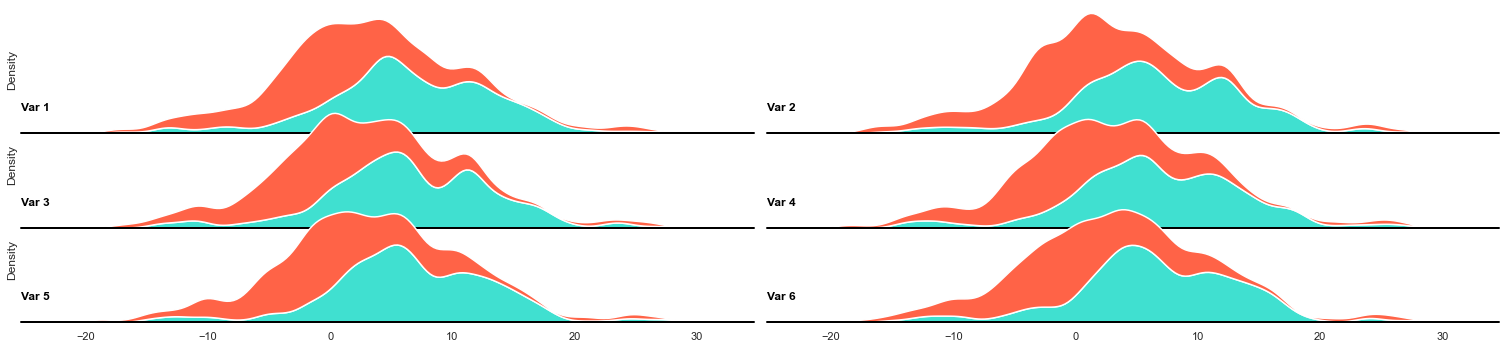

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
data = rs.randn(30, 100).cumsum(axis=1).reshape(-1, 6)
column_names = [f'Var {i}' for i in range(1, 7)]
df = pd.DataFrame(data, columns=column_names)
df['Status'] = rs.randint(0, 2, len(df))
for col in column_names:
    df.loc[df['Status'] == 1, col] += 5
df_long = df.melt(id_vars='Status', value_vars=column_names)

# Initialize the FacetGrid object
g = sns.FacetGrid(data=df_long, col="variable", aspect=6, height=1.8, col_wrap=2)

# Draw the densities
g.map_dataframe(sns.kdeplot, "value",
                bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5,
                hue="Status", hue_order=[0, 1], palette=['tomato', 'turquoise'], multiple='stack')
g.map(plt.axhline, y=0, lw=2, clip_on=False, color='black')

# Define and use a simple function to label the plot in axes coordinates
def label(x, color):
    ax = plt.gca()
    ax.text(0, .2, x.iloc[0], fontweight="bold", color='black',
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "variable")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], xlabel="")
g.despine(bottom=True, left=True)
plt.show()

In [5]:
df_long

,Status,variable,value
0,0,Var 1,-0.961877
1,1,Var 1,6.454942
2,0,Var 1,6.020015
3,0,Var 1,7.094057
4,0,Var 1,10.289022
...,...,...,...
2995,0,Var 6,-5.718156
2996,0,Var 6,-5.142314
2997,0,Var 6,-5.155104
2998,1,Var 6,3.339401
